# Model based on tabular data + NLP (title)

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.tabular import *
from fastai.metrics import accuracy

## Model

In [4]:
df = pd.read_feather('tabular-df')

In [ ]:
# title (from NLP model)
df['title_isnew_prob'] = pd.read_feather('title-df')

In [6]:
cont_cols = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6',
             'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'title_isnew_prob'] 
cat_cols = list(set(df.columns) - set(cont_cols) - {'condition'})
valid_sz = 10000
valid_idx = range(len(df)-valid_sz, len(df))
procs = [FillMissing, Categorify, Normalize]

In [7]:
data = (TabularList.from_df(df, cat_cols, cont_cols, procs=procs)
              .split_by_idx(valid_idx)
              .label_from_df(cols='condition')
              .databunch())

In [8]:
learn = get_tabular_learner(data, layers=[64], ps=[0.5], emb_drop=0.05, metrics=accuracy)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


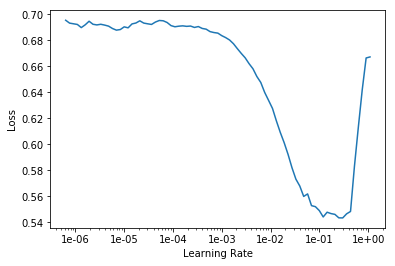

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(10, 5e-3, wd=1e-6)

Total time: 01:10
epoch  train_loss  valid_loss  accuracy
1      0.211267    0.210265    0.917200  (00:06)
2      0.186647    0.207828    0.916400  (00:06)
3      0.159084    0.217404    0.917100  (00:06)
4      0.114898    0.226102    0.921200  (00:07)
5      0.091307    0.221410    0.923400  (00:07)
6      0.088051    0.214281    0.924000  (00:07)
7      0.078463    0.230735    0.924700  (00:07)
8      0.073674    0.242582    0.924100  (00:07)
9      0.054637    0.244048    0.924100  (00:07)
10     0.055157    0.254020    0.923700  (00:07)

